Shape of data: (150, 4)

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


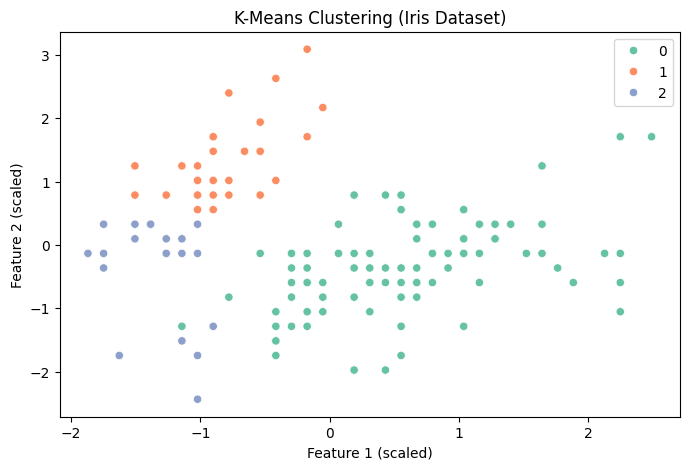

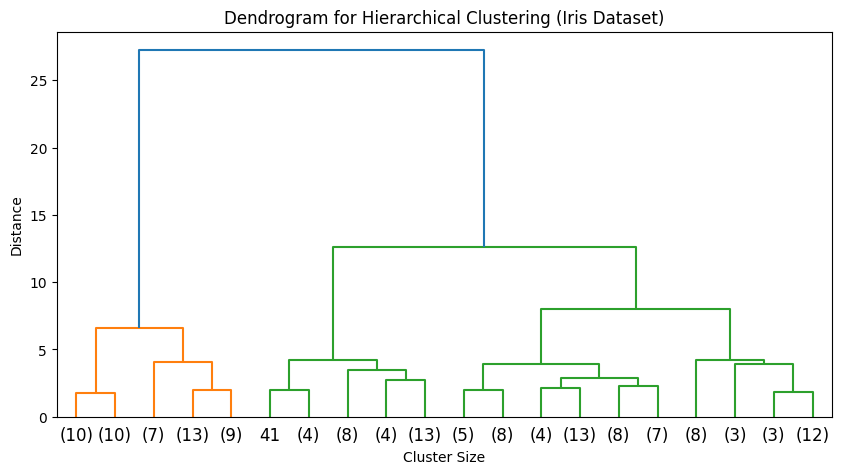

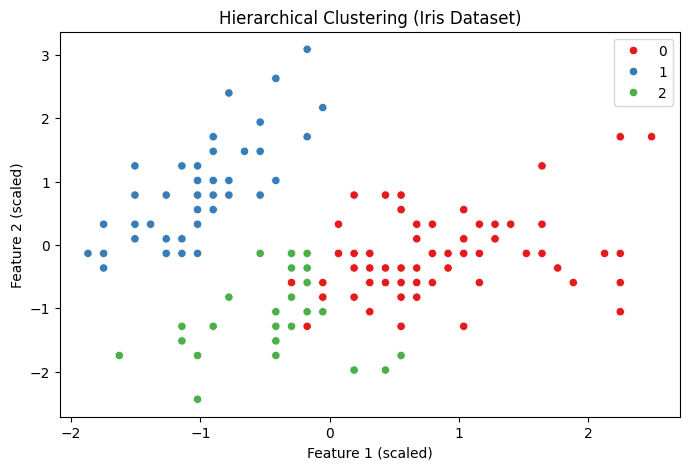

K-Means Cluster Labels: [0 1 2]
Hierarchical Cluster Labels: [0 1 2]

✅ Both K-Means and Hierarchical Clustering show similar grouping patterns.
✅ Iris dataset is well-suited for clustering because the data has clear separations among species.


In [1]:
# ML Assignment 5 - Clustering Algorithm
# Name: Sujitha Sudheer TS
# ---------------------------------------------

# Step 1: Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

# ---------------------------------------------
# Step 2: Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Since this is a clustering (unsupervised) problem, we will not use the target labels
print("Shape of data:", X.shape)
X.head()

# ---------------------------------------------
# Step 3: Data Preprocessing
# Checking for missing values
print("\nMissing values in each column:")
print(X.isnull().sum())

# Scaling the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------
# Step 4: K-Means Clustering

## Description:
# K-Means is an unsupervised clustering algorithm that partitions data into K clusters.
# It minimizes the sum of squared distances between data points and their assigned cluster centers.
# It’s suitable for the Iris dataset because the data has distinct groups and numeric continuous features.

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Adding cluster labels to dataframe
X_kmeans = X.copy()
X_kmeans['Cluster'] = kmeans_labels

# Visualize K-Means Clusters (first two features)
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("K-Means Clustering (Iris Dataset)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

# ---------------------------------------------
# Step 5: Hierarchical Clustering

## Description:
# Hierarchical clustering builds a hierarchy (tree) of clusters either bottom-up (agglomerative)
# or top-down (divisive). It’s suitable for Iris data as it allows us to visualize relationships
# between clusters using a dendrogram.

# Create linkage matrix
linked = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Dendrogram for Hierarchical Clustering (Iris Dataset)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.show()

# Applying Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X_scaled)

# Visualize Hierarchical Clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=agg_labels, palette='Set1')
plt.title("Hierarchical Clustering (Iris Dataset)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

# ---------------------------------------------
# Step 6: Comparison and Conclusion
print("K-Means Cluster Labels:", np.unique(kmeans_labels))
print("Hierarchical Cluster Labels:", np.unique(agg_labels))

print("\n✅ Both K-Means and Hierarchical Clustering show similar grouping patterns.")
print("✅ Iris dataset is well-suited for clustering because the data has clear separations among species.")


### Step 1: Import Libraries
In this step, we import all the required Python libraries for data analysis and clustering.
